In [25]:
# Here we are using the same Skeleton of chatbot and improving it by adding loops and conditions to store the chat history.
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from typing import TypedDict, Literal
import operator
from typing import List,Annotated
from langchain_core.messages import SystemMessage,HumanMessage,BaseMessage#(BaseMessage will add the flexibility of using HM , SM, AI Message in ChatBot )

from langgraph.checkpoint.memory import MemorySaver

In [26]:
from langgraph.graph.message import add_messages
# add_messages is the built-in function to add messages to the state in langgraph which gives more flexibility for BaseMessage, instead of using operator.add 
class ChatbotState(TypedDict):
    messages:Annotated[List[BaseMessage],add_messages]

In [27]:
model=ChatOpenAI()
def chat_node(state:ChatbotState):
    #take user query from the state, send it to LLM , response store to state
    messages=state['messages']
    response=model.invoke(messages)
    return {'messages':[response]}  # we have to pass the response as a list because in above messages is defined as List[BaseMessage]


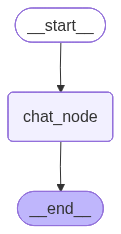

In [ ]:
#add Checkpointer
Checkpointer=MemorySaver()

graph=StateGraph(ChatbotState)

# add nodes now
graph.add_node('chat_node',chat_node)
# Now add edges
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

graph.compile()



In [29]:
workflow=graph.compile()
initial_state={
    'messages':[HumanMessage(content='What is the capital of India? ')]
}

workflow.invoke(initial_state)['messages'][-1].content


'New Delhi'

In [30]:
while True:
    user_message=input("TypeHere: ")
    print("User:",user_message)
    if user_message.lower() in ['exit','quit','bye']:
        print("Chatbot: Goodbye!")
        break
    response=workflow.invoke({'messages':[HumanMessage(content=user_message)]})
    print("AI:",response['messages'][-1].content)

User: hi
AI: Hello! How can I assist you today?
User: exit
Chatbot: Goodbye!
